# Tutorial 3: Fixed dimension MCMC with Eryn Eryn下固定维数的MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful

In the third tutorial, we are going to learn how to use MCMC through `Eryn` to do our data analysis investigations. In this tutorial, we will stick with simple examples and simple signals (like in Tutorial 1). In later tutorials, we will use eryn with real GW signals. 

在第三个教程中，我们将学习如何通过Eryn使用MCMC进行数据分析调查。在本教程中，我们将坚持使用简单的例子和简单的信号(就像在教程1中那样)。在之后的教程中，我们会在Eryn下使用真实的引力波信号。

## Task 1: build your own basic MCMC 搭建你自己的基础MCMC

In order to better understand MCMC and `Eryn`, we are going to start by building our own MCMC algorithm for a simple problem. We will do this with a single-dimensional Gaussian likelihood centered on ($\mu=0$) and a unit standard deviation ($\sigma=1$) and a uniform prior. 

为了更好地理解MCMC和Eryn，我们将从搭建一个简单问题的MCMC算法开始。我们将使用一维标准高斯似然。

In [2]:
def log_like_gauss(x):
    return -0.5 * x ** 2 - 1/2 * np.log(2 * np.pi * 1.0) # 1.0 is sigma

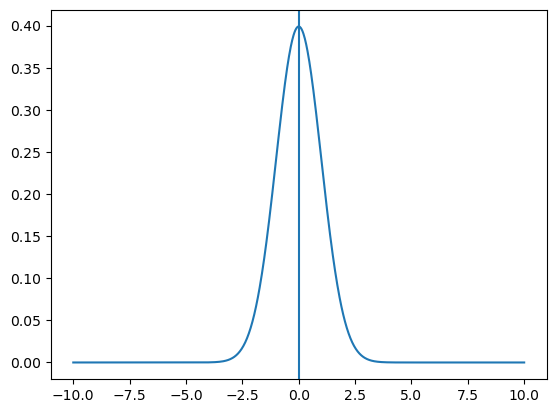

In [3]:
x_vals = np.linspace(-10.0, 10.0, 1000)
# notice the `exp` in there because we are working with the log of the likelihood.
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))
plt.axvline(0.0)

We are just going to write this into a simple loop. Gather your samples into the chain list.

我们将其写在一个简单的循环内。将你的样品收集到链表中。

In [4]:
num_steps = 100000

# get random starting point
current_point = np.random.uniform(-10.0, 10.0)
current_likelihood = log_like_gauss(current_point)
chain = []
for step in range(num_steps):
    # propose new point using a Gaussian distribution with standard deviation of 0.5
    # hint: use current + sigma * N() where N() is a draw from a normal distribution 
    # (np.random.randn)
    new_point = current_point + 0.5 * np.random.randn()
    
    # get new likelihood
    new_likelihood = log_like_gauss(new_point)
    
    # calculate the change in posterior
    # here we are using a uniform prior, so its value will not change, so for now do not
    # worry about the prior.
    delta_posterior = new_likelihood - current_likelihood
    
    # accept or reject
    # if change in log posterior is greater than log(np.random.rand()), accept, else reject
    accept = delta_posterior > np.log(np.random.rand())
    
    if accept:
        current_point=new_point
        current_likelihood = new_likelihood

    # append point to chain
    
    chain.append(current_point)
    

Now plot the chain. You will notice that the beginnning requires a "burn in" phase. So, when calculating the posterior, you must remove this. There are ways to calculate how much burn in is appropriate, but we will not get into that here. 

现在作图画出此链。你会注意到开始时需要一个“点燃”相位，所以在后续计算时必须去掉这个部分。有很多方法可以计算多少“点燃”是合适的，但是我们暂时不在这里讨论。

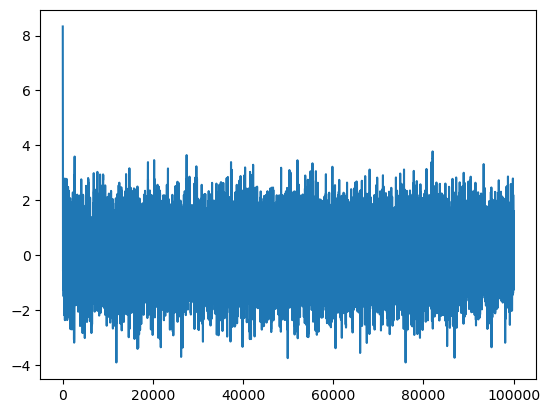

In [5]:
plt.plot(chain)

Plot the posterior distribution generated by the MCMC and compare it against the true Likelihood plot from above. Remember to set `density=True` when building the histogram.

绘制由MCMC生成的后验分布并将其与上面真正的似然图进行比较。记得在构建直方图的时候设置density=True。

If we take a step back here, we realize MCMC is really just a way to draw samples from a distribution. When the distribution is simple like this example, it will usually be available already with no need to run MCMC (like in scipy). However, in our area of work, the Likelihood distribution tends to be very difficult to deal with, which is why MCMC is so useful for us. To illustrate this, we will draw samples from the same distribution available in Numpy (`np.random.randn`).

如果我们回头看这里，我们会意识到MCMC事实上只是一种从分布中抽取样本的方法。当分布和示例一样简单的时候，它通常已经可用，不需要运行MCMC(就像在scipy中那样)。然而载我们的工作领域，似然分布通常很难处理，这就是为什么对我们来说MCMC是如此有用。为了展示这一点，我们将从Numpy(np.random.randn)中可用的相同分布中抽取样本。

(array([2.88858607e-04, 6.35488936e-04, 1.03989099e-03, 1.79092336e-03,
        3.52407501e-03, 5.25722665e-03, 1.16698877e-02, 1.68115709e-02,
        2.64016767e-02, 4.37909649e-02, 6.22779157e-02, 9.39368191e-02,
        1.28946482e-01, 1.70311035e-01, 2.02836514e-01, 2.56275356e-01,
        3.07345558e-01, 3.40795385e-01, 3.81004503e-01, 3.98913737e-01,
        3.92096673e-01, 3.96429553e-01, 3.71934343e-01, 3.29876529e-01,
        2.96484474e-01, 2.58181823e-01, 1.95961679e-01, 1.59218864e-01,
        1.08957467e-01, 8.49244305e-02, 5.51719940e-02, 4.01513464e-02,
        2.60550464e-02, 1.34608111e-02, 7.16369346e-03, 4.39065083e-03,
        2.77304263e-03, 1.67537992e-03, 4.62173772e-04, 2.31086886e-04]),
 array([-3.91562829, -3.72330044, -3.53097258, -3.33864473, -3.14631688,
        -2.95398903, -2.76166117, -2.56933332, -2.37700547, -2.18467762,
        -1.99234976, -1.80002191, -1.60769406, -1.41536621, -1.22303835,
        -1.0307105 , -0.83838265, -0.6460548 , -0.45372695,

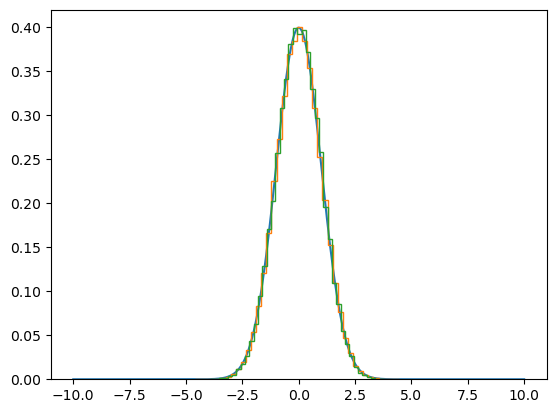

In [6]:
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))
plt.hist(np.random.randn(100000), bins=40, density=True, histtype="step")
plt.hist(chain[10000:], bins=40, density=True, histtype="step")

## Task 2: Use Eryn to reproduce the above result. 利用Eryn复现上述结果

Now use the `EnsembleSampler` in `Eryn` to reproduce the above results. If you are struggling, look at the `Eryn` tutorial. For Eryn, you will need to define a prior. Use `uniform_dist` to create a simple uniform distribution. For this example, you only need to worry about the Ensemble Sampler keyword arguments. Leave those all as default values and only enter the arguments.

现在使用Eryn中的EnsembleSampler来复现上述结果。如果感到困难，请重新阅读Eryn教程。对于Eryn来说，需要先定义一个先验。使用uniform_dist来创建一个简单的均匀分布。对于本例，只需要考虑吧Ensemble Sampler关键字参数。将这些都保留为默认值并且只输入参数。

Useful documentation 参考文档:
* [EnsembleSampler](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler)
* [State](https://mikekatz04.github.io/Eryn/html/user/state.html#eryn.state.State)
* [uniform_dist](https://mikekatz04.github.io/Eryn/html/user/prior.html#eryn.prior.uniform_dist)
* [ProbDistContainer](https://mikekatz04.github.io/Eryn/html/user/prior.html#eryn.prior.ProbDistContainer)
* [Backend](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend)

In [7]:
# imports
from eryn.ensemble import EnsembleSampler
from eryn.state import State
from eryn.prior import uniform_dist, ProbDistContainer

Initialize your sampler here. The prior initialization should take the form: `ProbDistContainer({0: prior distribution})`.

在这里初始化采样器。先验的初始化的形式应该为ProbDistContainer({0: prior distribution})。

In [9]:
prior = ProbDistContainer({0: uniform_dist(-1000.0, 1000.0)})
nwalkers = 20
ndim = 1 
sampler = EnsembleSampler(nwalkers, 1, log_like_gauss, prior)

Now choose your starting point (one for each walker). You can draw from the prior or not. Just make sure to remove any burn in at the end. Then put the starting point into a `State` object. The key here is the start point should have shape `(1, nwalkers, 1, ndim)`. Here the two 1s are for temperatures (which we are not using right now) and the number of leaves or model count (this is for RJ). After this is complete, run the sampler.

现在选择你的起始点(每个walker)。你可以选择是否从先验中提取。最后一定要把“点燃”的部分给去掉，然后将起始点放入State对象中。这里的关键的是起始点的格式应该是(1, nwalkers, 1, ndim)。这里的两个1是温度(目前用不上)和叶的数量或模型计数(RJ)。完成后运行采样器。

Documentation 参考文档:
* [run_mcmc](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler.run_mcmc)

In [11]:
start_point = prior.rvs(size=(1, nwalkers, 1))
start_state = State(start_point)
end_point = sampler.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [00:11<00:00, 902.26it/s]


Examine the output chains by using the backend:

使用后端检查输出链；

* [Backend](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend)

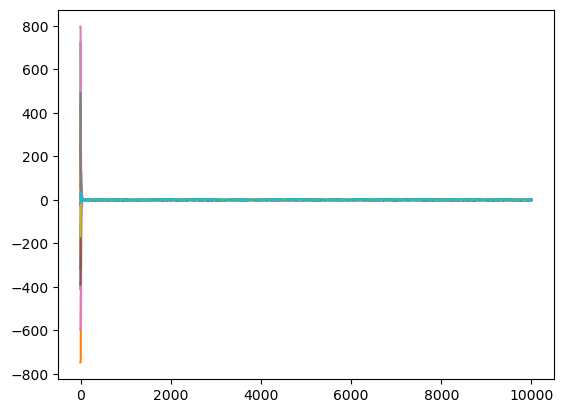

In [12]:
chain = sampler.get_chain()["model_0"]
for w in range(nwalkers):
    plt.plot(chain[:, 0, w, 0])

Compare your output chains to the injected Gaussian distribution. They should match. Make sure when you plot the histogram, you set `density=True`. 

使用你的输出链和输入的高斯分布进行比较。它们应该能对应上。确保绘制直方图时已经设定density=True。

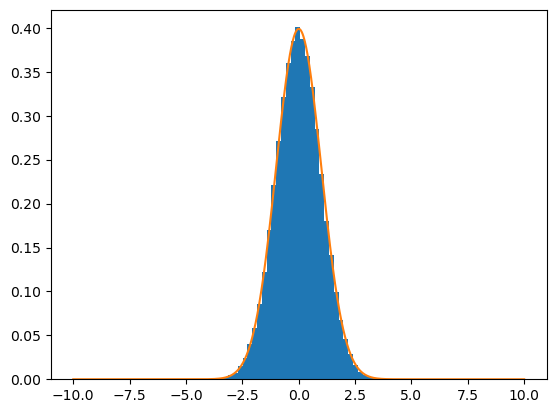

In [14]:
plt.hist(chain[1000:].flatten(), bins=40, density=True)#density set
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))

## Task 3: Parallel Tempering 并行退火

Now we will add parallel tempering. In order to examine the effect of addering tempering, we are going to look at a 1D distribution with two Gaussian peaks with different weights. We have provided the log Likelihood function for this exercise. You just set the x limits to proper normalize the distribution.

现在我们要添加并行退火。为了检验加质退火的影响，我们将研究一维具有两个不同权重高斯峰的分布。我们为此练习提供了对数似然函数。你只需要设定合理的x极限来对分布进行正态化。

Parallel tempering works by supressing the Log Likelihood in comparison to the log prior: `1/T * logL + logp`. This effect lowers the peaks making it easier for higher temperature chains to traverse a low-Likelihood portion of the Likelihood surface. This helps to properly sample distributions with multiple posterior modes. 

并行退火的原理是通过与1/T * logL + logp相比，抑制对数似然。这种效应降低了峰值，使较高的温度链更容易穿过似然表面的低似然部分。这有助于对具有多个后验模式的分布进行适当的抽样。

We will start by sampling without tempering to see how well that does. Then we will add tempering to see the improvement. 

我们将从不退火的抽样开始检查效果。然后我们将添加退火，看看改善的情况。

In [15]:
from scipy.special import logsumexp

class LogLikeTwoGuass:
    def __init__(self, x_min: float, x_max: float):
        num_for_norm = 100000
        self.norm = 1.0
        x_vals = np.linspace(x_min, x_max, num_for_norm)
        y_vals = np.array([np.exp(self.log_like_two_gauss(x_tmp)) for x_tmp in x_vals])
        self.norm = np.trapz(y_vals, x=x_vals)
        
    def log_like_two_gauss(self, x):
        return logsumexp(np.array([(np.log(0.2) + -0.5 * (x - 50.0) ** 2), (np.log(0.8) + -0.5 * (x + 50.0) ** 2)]), axis=0) - np.log(self.norm)

In [16]:
like = LogLikeTwoGuass(-1000.0, 1000.0)

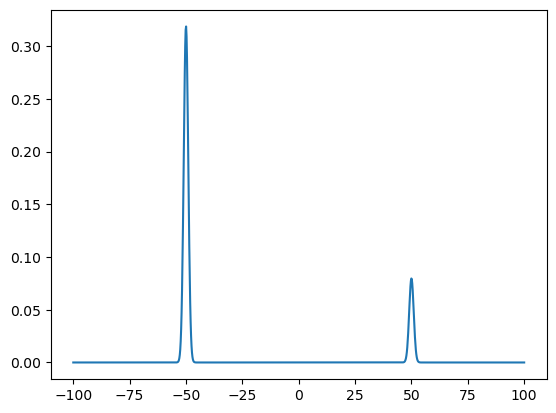

In [17]:
x_vals = np.linspace(-100.0, 100.0, 1000)
# notice the `exp` in there because we are working with the log of the likelihood.
plt.plot(x_vals, np.exp(like.log_like_two_gauss(x_vals)))
#plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))


Start with a non-tempered sampler. Run it and plot the histogram over the injected Likelihood. 

从一个未退火的采样器开始。运行并绘制注入似然的直方图。

In [19]:
prior = ProbDistContainer({
    0: uniform_dist(-1000.0, 1000.0)
})
nwalkers = 20
ndim = 1 
sampler = EnsembleSampler(nwalkers, 1, like.log_like_two_gauss, prior)


start_point = prior.rvs(size=(1, nwalkers, 1))
start_state = State(start_point)
sampler.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [00:16<00:00, 588.29it/s]


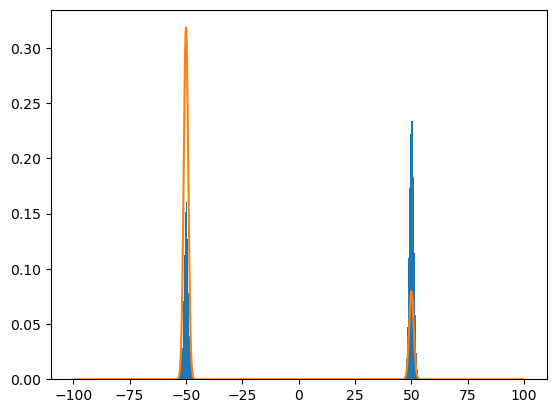

In [20]:
chain = sampler.get_chain()["model_0"][:, 0, :, 0]
plt.hist(chain[7000:].flatten(), bins=np.arange(-75., 75., 0.5), density=True)
plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))

### Question

The plot should not look correct. Why do you think this is? When not using tempering, what determines the number of walkers inhabiting each peak?

绘制的图样看起来并不正确。你觉得这是为什么？当我们不退火的时候，是什么决定了每个峰值上walker的数量？

Now add temperatures by providing `tempering_kwargs` kwarg to `EnsembleSampler`.

现在通过向EnsembleSampler提供tempering_kwargs关键字参数来添加温度。

Useful Documentation 参考文档:
* [EnsembleSampler](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler)
* [TemperatureControl](https://mikekatz04.github.io/Eryn/html/user/temper.html#eryn.moves.tempering.TemperatureControl)

In [21]:
ntemps = 10
sampler_pt = EnsembleSampler(nwalkers, 1, like.log_like_two_gauss, prior, tempering_kwargs=dict(ntemps=ntemps, Tmax=np.inf))

Sample start points again from the prior with shape `(ntemps, nwalkers, 1, ndim)`. Then run the sampler.

再次从格式为(ntemps, nwalkers, 1, ndim)的先验的起点开始采样。然后运行采样器。



In [22]:
start_point = prior.rvs(size=(ntemps, nwalkers, 1))
start_state = State(start_point)
sampler_pt.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [01:17<00:00, 129.01it/s]


Plot the chains over the injection distribution.


在注入分布上对链进行绘图。

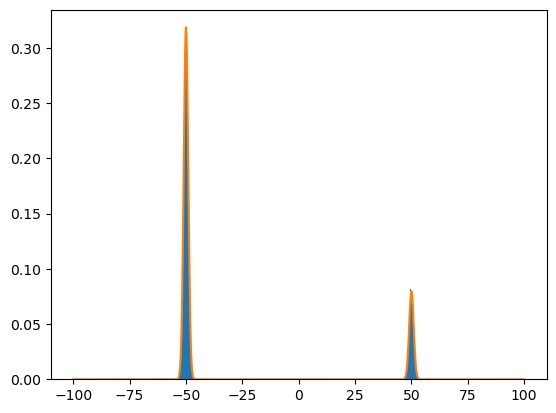

In [23]:
chain = sampler_pt.get_chain()["model_0"][:, 0, :, 0]
plt.hist(chain[1000:].flatten(), bins=np.arange(-75., 75., 0.5), density=True)
plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))

Now the plots should match very weel. Can you describe the change that took place?

现在图样应该吻合得很好。你能描述为什么会发生这样的变化吗？



## Task 6: Add GWs! 添加引力波

Now we will add GW signals in the form of the simple Sinusoid we used in the first tutorial. We will start with the waveform function. Set up the `DataResidualArray` (inject whatever parameter you would like), `SensitivityMatrix`, and `AnalysisContainer`. Remember, we do not have a response on this signal, so the sensitivity curve should be `LISASens`. 

现在我们将添加例如教程1中使用过的简单正弦波形作为引力波信号，我们将从波形函数开始、设置好DataResidualArray，注入任何你想修改的参数，SensitivityMatrix和AnalysisContainer。记住我们对这个信号没有相应，因此灵敏度曲线应该为LISASens。

In [24]:
from lisatools.datacontainer import DataResidualArray
from lisatools.analysiscontainer import AnalysisContainer
from lisatools.sensitivity import SensitivityMatrix, LISASens

We will add the waveform for you.

我们为你添加了波形。

In [37]:
def sinusoidal_waveform(A: float, f0: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]: # type: ignore
    h1 = A * np.sin(2 * np.pi * (f0 * t) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t) + phi0)
    return [h1, h2]

Generate the injection data, input it into a `DataResidualArray`, load a `SensitivityMatrix`, and store everything in an `AnalysisContainer`, including the sinusoidal waveform generator. 

生成注入数据，将其输入DataResidualArray，加载SensitivityMatrix，把所有内容包括正弦波形发生器存储在AnalysisContainer中。

In [26]:
dt = 10.0
t_arr = np.arange(100000) * dt
data = DataResidualArray(sinusoidal_waveform(1e-21, 2e-3, np.pi / 3, t_arr), dt=dt)
sens_mat = SensitivityMatrix(data.f_arr, [LISASens, LISASens])
analysis = AnalysisContainer(data, sens_mat, signal_gen=sinusoidal_waveform)

/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d

Calculate the SNR of the injection. (`AnalysisContainer.calculate_signal_snr`)

计算注入的信噪比。

In [27]:
analysis.calculate_signal_snr(1e-21, 2e-3, 0.0, t_arr)

(30.849156386054677, 15.424578193023093)

Biuld the prior distributions for the three parameters.

建立三个参数的先验分布。

In [28]:
priors = ProbDistContainer({
    0: uniform_dist(9e-22, 3e-21),
    1: uniform_dist(1.5e-3, 2.5e-3),
    2: uniform_dist(0.0, 2 * np.pi)
})

Initialize the sampler. For the Likelihood function, you can use `AnalysisContainer.eryn_likelihood_function`. For  now, we will not use tempering. This generation scheme is not efficient in terms of the Likelihood evaluation time. So, we will just run this as a quick example. You can run it longer later on and/or parallelize it with Eryn's `pool` capabilities. This basic example we are using illustrates the need for fast waveform generation capabilities. 

初始化采样器。对于似然函数，可以使用AnalysisContainer.eryn_likelihood_function。现在我们不进行退火。这种生成方案在似然评估时间方面效率不高。所以我们运行此作为一个简单的例子。可以以后运行更长的时间，或者使用Eryn中的pool功能将其并行化。我们使用的这个基本示例说明了对快速波形生成功能的需求。

In [ ]:
ndim = 3
sampler = EnsembleSampler(
    nwalkers,
    ndim, 
    analysis.eryn_likelihood_function,
    priors,
    args=(t_arr,)
)

Generate the start state and run the sampler. 

生成初态并运行采样器。

In [36]:
start_state = State(priors.rvs(size=(1, nwalkers, 1)))
sampler.run_mcmc(start_state, 100, progress=True)

ValueError: incompatible input dimensions

You can examine the chains and/or Likelihood values if you want, but you will likely have to run it for longer to get any reasonable results. 

如果你愿意可以检测链或者似然的值，不过你可能得运行更长的时间来获得合理的结果。

### Question

What types of things can we do to speed up this calculation? Translate this into the waveform environment. 

我们可以做哪些事来加速计算？将它翻译到波形环境中。

## Task 4: Calculate the evidence 计算证据

Calculate the evidence for the single-peaked Gaussian distribution using thermodynamic integration from Eryn. Use 10 walkers and 50 temperatures to start. You can play with these numbers later and observe their effect on the measurement. Use the `burn` kwarg when running `run_mcmc`. **Important**: for the `tempering_kwargs` keyword argument for `EnsembleSampler`, you must add to the dictionary: `stop_adaptation=burn`. This will adapt the temperatures during burn in and then hold them fixed while recording samples. 

利用Eryn的热力学积分来计算单峰高斯函数分布的证据。用10助行器和50温度开始。可以稍后使用这些数字并观察它们对测量的影响。使用burn关键字参数来运行run_mcmc。提示：对于EnsembleSampler中的关键字参数tempering_kwargs，必须在字典中添加stop_adaptation=burn。这将适应燃烧过程中的温度，然后在记录样本时固定温度。


Useful documentation 参考文档:
* [thermodynamic_integration_log_evidence](https://mikekatz04.github.io/Eryn/html/user/utils.html#eryn.utils.utility.thermodynamic_integration_log_evidence)

In [30]:
# imports
from eryn.utils.utility import thermodynamic_integration_log_evidence

Initialize the sampler. Run the MCMC.

初始化采样器，运行MCMC。

In [31]:
nwalkers = 10
ntemps = 50
burn = 2000
sampler_pt_2 = EnsembleSampler(nwalkers, 1, log_like_gauss, prior, tempering_kwargs=dict(stop_adaptation=burn, ntemps=ntemps, Tmax=np.inf))

start_point = prior.rvs(size=(ntemps, nwalkers, 1))
start_state = State(start_point)
sampler_pt_2.run_mcmc(start_state, 10000, burn=burn, progress=True)

100%|██████████| 10000/10000 [01:08<00:00, 146.10it/s]


1) Compute the average likelihood across all samples and walkers **within** each temperature chain.
计算所有推进器和样本在每个温度链下的平均似然
2) Get the inverse temperatures (`betas`) out of the sampler backend and make sure they are the same over the entire run.
从采样器获得逆温度并且确保它们在整个运行时间中相同。
3) Calculate the evidence.
计算证据。

Useful Documentation 参考文档:
* [thermodynamic_integration_log_evidence](https://mikekatz04.github.io/Eryn/html/user/utils.html#eryn.utils.utility.thermodynamic_integration_log_evidence)
* [Backend.get_log_like](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend.get_log_like)
* [Backend.get_betas](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend.get_betas)

In [38]:
logl_avg = sampler_pt_2.get_log_like().mean(axis=(0, 2))
betas = sampler_pt_2.get_betas()[-1]
assert np.all(betas == sampler_pt_2.get_betas()[0])
logz = thermodynamic_integration_log_evidence(betas, logl_avg)
print(logz)

(-16.34288880464956, 87.24589795211035)


## Task 5: Model Selection 选择模型

Perform model comparison between a Gaussian and Cauchy pulse using thermodynamic integration of the evidence.

使用证据的热力学积分在高斯脉冲和柯西脉冲之间进行模型比较。

Here are the pulse functions and the Likelhiood. We will assume each pulse has an amplitude and mean parameter. We set the standard deviation to be 1. 

下面是脉冲函数和其似然。我们假设每个脉冲都有一个振幅和平均参数，标准差设置为1.

In [39]:
from scipy.stats import cauchy
def gaussian_pulse(x, a, b):
    f_x = a * np.exp(-((x - b) ** 2) / (2 * 1.0 ** 2))
    return f_x

def cauchy_pulse(x, a, b):
    f_x = a * cauchy.pdf(x - b)
    return f_x

def log_like_fn(params, t, data, sigma, which_template):

    pulse_gen = gaussian_pulse if which_template == "gauss" else cauchy_pulse
    template = pulse_gen(t, *params)

    ll = -0.5 * np.sum(((template - data) / sigma) ** 2, axis=-1)
    return ll

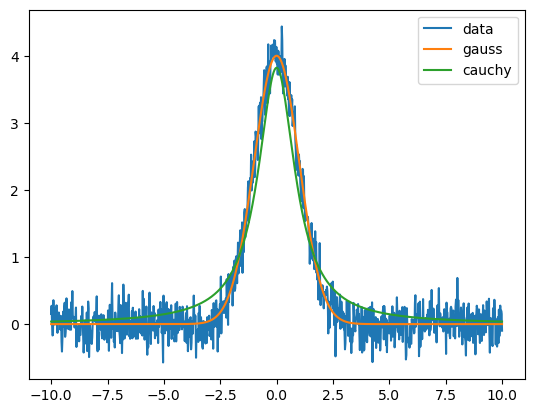

In [40]:
t_vals = np.linspace(-10.0, 10.0, 1000)
sigma = 0.2
amp_true = 4.0
mean_true = 0.0
true_data = gaussian_pulse(t_vals, amp_true, mean_true)
data = true_data + np.random.randn(*t_vals.shape) * sigma
cauchy_data = cauchy_pulse(t_vals, amp_true * 3, mean_true)
plt.plot(t_vals, data, label="data")
plt.plot(t_vals, true_data, label="gauss")
plt.plot(t_vals, cauchy_data, label="cauchy")
plt.legend()
# plt.plot(x_vals, np.exp(log_like_fn()))
# plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))

We need to run separate sampler objects for each model. 

The priors are identical really for the two models. The amplitude prior should span the injection values. The mean prior should span the domain of time.

Initialize the priors for each, the sampler for each, sample a start point for each, and run both samplers with the setup we used above. 


我们需要为每个模型运行单独的采样器对象。

这两个模型的先验是相同的。先验振幅应跨越注入值。平均先验应该跨越时间域。

为每个采样器初始化先验，为每个采样器初始化七点，并使用我们上面使用的设置运行两个采样器。

In [41]:
priors = {}
samplers = {}
burn = 1000
for name in ["gauss", "cauchy"]: 
    priors[name] = ProbDistContainer({
    0: uniform_dist(0.0, 40.0),
    1: uniform_dist(t_vals.min(), t_vals.max())
})
    samplers[name] = EnsembleSampler(
        nwalkers,
        2,
        log_like_fn,
        priors,
        branch_names=[name],
        tempering_kwargs=dict(stop_adaptation=burn, ntemps=ntemps, Tmax=np.inf),
        args=(t_vals, data, sigma, name)
    )

    start_point = priors[name].rvs(size=(ntemps, nwalkers, 1))
    start_state = State({name: start_point})
    samplers[name].run_mcmc(start_state, 10000, burn=burn, progress=True)
    



100%|██████████| 10000/10000 [06:24<00:00, 26.02it/s]


Repeat the calculation from above for both models. Then find Bayes Factor.

对两个模型重复上述计算。然后得出贝叶斯因子。


In [42]:
logz_out = {}
for name in ["gauss", "cauchy"]: 
    logls = samplers[name].get_log_like().mean(axis=(0, 2))
    betas = samplers[name].get_betas()
    assert np.all(betas[-1] == betas[0])
    logz, dlogz = thermodynamic_integration_log_evidence(betas[0], logls)
    print(name, logz, dlogz)
    logz_out[name] = logz

print("2log(Bayes Factor):", 2 * (logz_out["gauss"] - logz_out["cauchy"]))

gauss -554.8002726096585 38.593770496789375
cauchy -1083.9002533368164 32.751786315545814
2log(Bayes Factor): 1058.1999614543158


### Question

If we change the noise, what effect will this have on our results?

如果我们改变噪声，我们的结果会有什么影响？